# Présentation de l'Analyse de Chaînes de Markov

## Introduction
Cette présentation explore l'analyse des chaînes de Markov à l'aide d'un notebook Jupyter.


## Matrice Stochastique en Entrée
- Commencez par entrer la matrice stochastique représentant la chaîne de Markov.


In [1]:
n = int(input('entrer taille'))


In [2]:

matrix = []
error_range = 0.01
for i in range(n):
    row=[]
    while(sum(row)<(1-error_range) or sum(row)>(1+error_range)):
        print("la matrice doit etre stochastique, la somme des lignes doit egale 1")
        for j in range(n):
            x= float(input(f'input the [{i}][{j}] element'))
            row.append(x)
        if(sum(row)<(1-error_range) or sum(row)>(1+error_range)):
            print(sum(row)<(1-error_range))
            print(sum(row)>(1+error_range))
            print("essayer encore une fois avec ce ligne")
            row=[]
    matrix.append(row)

print(matrix)

la matrice doit etre stochastique, la somme des lignes doit egale 1
la matrice doit etre stochastique, la somme des lignes doit egale 1
la matrice doit etre stochastique, la somme des lignes doit egale 1
[[0.5, 0.5, 0.0], [0.25, 0.0, 0.75], [0.0, 0.0, 1.0]]


## creer une fonction reccursive qui trouve touts les états accessible à partir d'un état i
   

In [3]:

list=[]
def reccursive_search(matrix,i):
    """
    Fonction récursive utilisant DFS pour trouver tous les états accessibles depuis un état donné.

    :param matrix: Matrice stochastique représentant la chaîne de Markov.
    :param i: État donné.
    """
    for j in range(len(matrix[i])):
        if matrix[i][j] != 0 and (j not in list):
            list.append(j)
            reccursive_search(matrix,j)

reccursive_search(matrix=matrix,i=1)
print(list)

[0, 1, 2]


creer ainsi une list et un dictionnaire qui rassemble tout les etats accessibles de tout les états 

In [4]:
trans = []
for i in range(len(matrix)):
    list=[]
    reccursive_search(matrix=matrix, i=i)
    trans.append(list)
print(trans)
dict = {f'etat: {i}': trans[i] for i in range(len(trans))}
print(dict)


[[0, 1, 2], [0, 1, 2], [2]]
{'etat: 0': [0, 1, 2], 'etat: 1': [0, 1, 2], 'etat: 2': [2]}


## Communication entre États
Lorsque l'on dit que deux états dans une chaîne de Markov se communiquent, cela signifie qu'il est possible de passer de l'un à l'autre avec une probabilité non nulle, et vice versa, même si cela ne se fait pas nécessairement en un seul pas.

creer une liste des etats qui se communiquent

In [5]:

comm= []
for i in range(len(trans)):
    
    for state in trans[i]:
        if i == state:
            print(f'{i} <----> {state}')
            comm.append((i,i))
        else:
            for j in trans[state]:
                if j == i:
                    if ((min(i,state),max(i,state)) not in comm ):
                        comm.append((min(i,state),max(i,state)))
                        print(f'{i} <----> {state}')
comm

0 <----> 0
0 <----> 1
1 <----> 1
2 <----> 2


[(0, 0), (0, 1), (1, 1), (2, 2)]

## Sous-Classes dans une Chaîne de Markov
les sous-classes sont des ensembles d'états qui communiquent entre eux, mais qui ont une probabilité nulle de communication avec les états en dehors de ces ensembles. En d'autres termes, tous les états à l'intérieur d'une sous-classe peuvent atteindre les uns les autres avec une probabilité non nulle, formant ainsi une structure de communication interne.

### trouver les sous classes

In [6]:
comm_copy = comm.copy()
comm_copy

final = {}

for i in range(len(comm_copy)):
    if comm_copy[i] is None: continue
    else:
        for j in range(len(comm_copy)):
            if i == j: continue
            elif comm_copy[j] is None: continue
            else:
                for state in comm_copy[j]:
                    if state in comm_copy[i]:
                        comm_copy[i] = tuple(set(comm_copy[i] + comm_copy[j]))
                        comm_copy[j] = None
                        break

final={f'sous class {i}': comm_copy[i] for i in range(len(comm_copy)) if comm_copy[i] is not None}
print(final)

{'sous class 0': (0, 1), 'sous class 3': (2, 2)}


Une matrice de transition P d'une chaîne de Markov est dite réductible si l'ensemble des états peut être divisé en deux sous-ensembles non vides de telle sorte qu'il n'existe aucune probabilité de transition directe d'un état dans un sous-ensemble vers un état dans l'autre sous-ensemble.

puisqu'on a trouvé plus qu'une seule sous classe alore la matrice est irreductible

## Graphique d'une Chaîne de Markov
Un graphique d'une chaîne de Markov est une représentation visuelle où chaque nœud du graphe correspond à un état dans la chaîne de Markov, et chaque arête représente une transition possible entre deux états. Ces transitions sont associées à des probabilités définies dans une matrice stochastique.

## dessiner un graphique de la chaine

{(0, 0): Text(1.0, 1.986821512250319e-08, '0.5'),
 (0, 1): Text(0.24999996274709668, 0.43301271829021687, '0.5'),
 (0, 2): Text(0.2500000372529033, -0.43301270835610933, '0.0'),
 (1, 0): Text(0.24999996274709668, 0.43301271829021687, '0.25'),
 (1, 1): Text(-0.5000000745058066, 0.8660254167122187, '0.0'),
 (1, 2): Text(-0.5, -9.934107536579972e-09, '0.75'),
 (2, 2): Text(-0.4999999254941933, -0.8660254365804337, '1.0')}

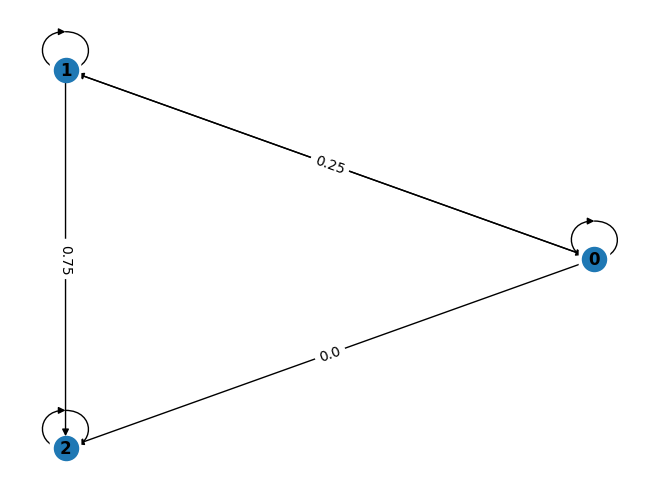

In [7]:
import networkx as nx
 
G = nx.DiGraph()
 

for i in range(len(trans)):
    for j in range(len(trans[i])):
        G.add_edge(i,trans[i][j], weight = matrix[i][trans[i][j]])


 
pos=nx.circular_layout(G)
nx.draw(G, pos, with_labels=True, font_weight='bold')
edge_weight = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels = edge_weight)

## Conclusion
Dans cette présentation, nous avons abordé l'entrée d'une matrice stochastique, la recherche des sous-classes d'états, la vérification de la réductibilité de la matrice, et la visualisation de la chaîne de Markov sous forme de graphe stochastique.